In [1]:
import numpy as np
import pandas as pd


In [2]:
netflix = pd.read_csv("NFLX.csv")

In [3]:
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
netflix.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7181700


# DATA PREPROCESSING

In [5]:
netflix.shape

(5044, 7)

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [7]:
netflix.Date = pd.to_datetime(netflix.Date)

In [8]:
netflix.Date

0      2002-05-23
1      2002-05-24
2      2002-05-28
3      2002-05-29
4      2002-05-30
          ...    
5039   2022-05-27
5040   2022-05-31
5041   2022-06-01
5042   2022-06-02
5043   2022-06-03
Name: Date, Length: 5044, dtype: datetime64[ns]

In [9]:
netflix['Year'] = netflix['Date'].dt.year
netflix['Month'] = netflix['Date'].dt.month
netflix['Day'] = netflix['Date'].dt.day
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30


In [10]:
netflix.drop('Date',axis = 1,inplace = True)

In [11]:
netflix.shape

(5044, 9)

In [12]:
netflix.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
dtype: int64

In [13]:
netflix.duplicated().sum()

0

In [14]:
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03,5044.000000,5044.000000,5044.000000
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07,2011.905630,6.545797,15.737708
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07,5.798402,3.423809,8.758690
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05,2002.000000,1.000000,1.000000
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06,2007.000000,4.000000,8.000000
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07,2012.000000,7.000000,16.000000
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07,2017.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08,2022.000000,12.000000,31.000000


# EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
corr = netflix.corr()

In [17]:
corr

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Open,1.000000,0.999863,0.999853,0.999695,0.999695,-0.262560,0.814140,-0.004033,-0.003739
High,0.999863,1.000000,0.999815,0.999861,0.999861,-0.261281,0.814615,-0.004482,-0.003833
Low,0.999853,0.999815,1.000000,0.999856,0.999856,-0.264033,0.813706,-0.003523,-0.003572
Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Adj Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Volume,-0.262560,-0.261281,-0.264033,-0.262548,-0.262548,1.000000,-0.108797,-0.044664,0.032562
Year,0.814140,0.814615,0.813706,0.814257,0.814257,-0.108797,1.000000,-0.072108,-0.006204
Month,-0.004033,-0.004482,-0.003523,-0.004129,-0.004129,-0.044664,-0.072108,1.000000,-0.001500
Day,-0.003739,-0.003833,-0.003572,-0.003773,-0.003773,0.032562,-0.006204,-0.001500,1.000000


<Axes: >

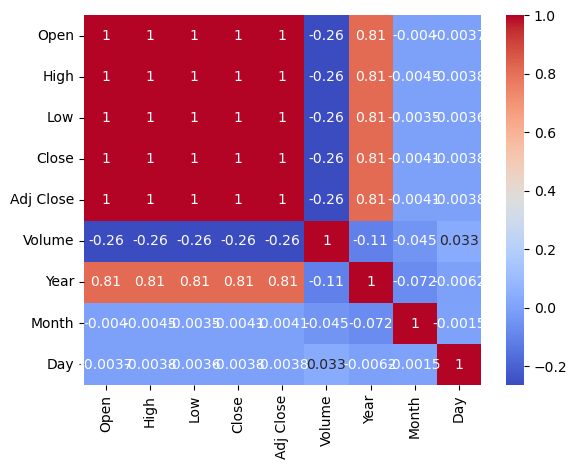

In [18]:
sns.heatmap(corr,annot= True,cmap = 'coolwarm',cbar = True)

# DATA SCATTERNESS

<Axes: xlabel='Open', ylabel='Close'>

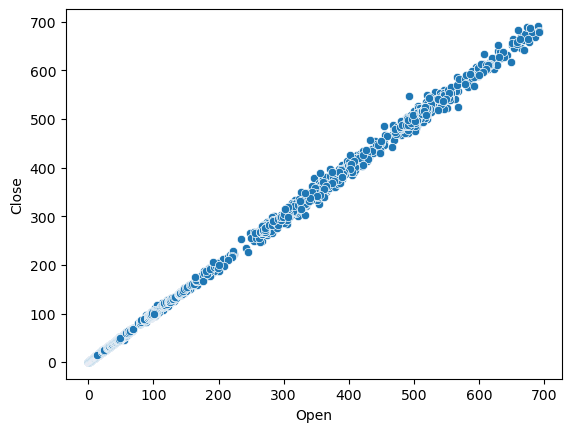

In [19]:
sns.scatterplot(x=netflix.Open	, y=netflix.Close)#for individual column

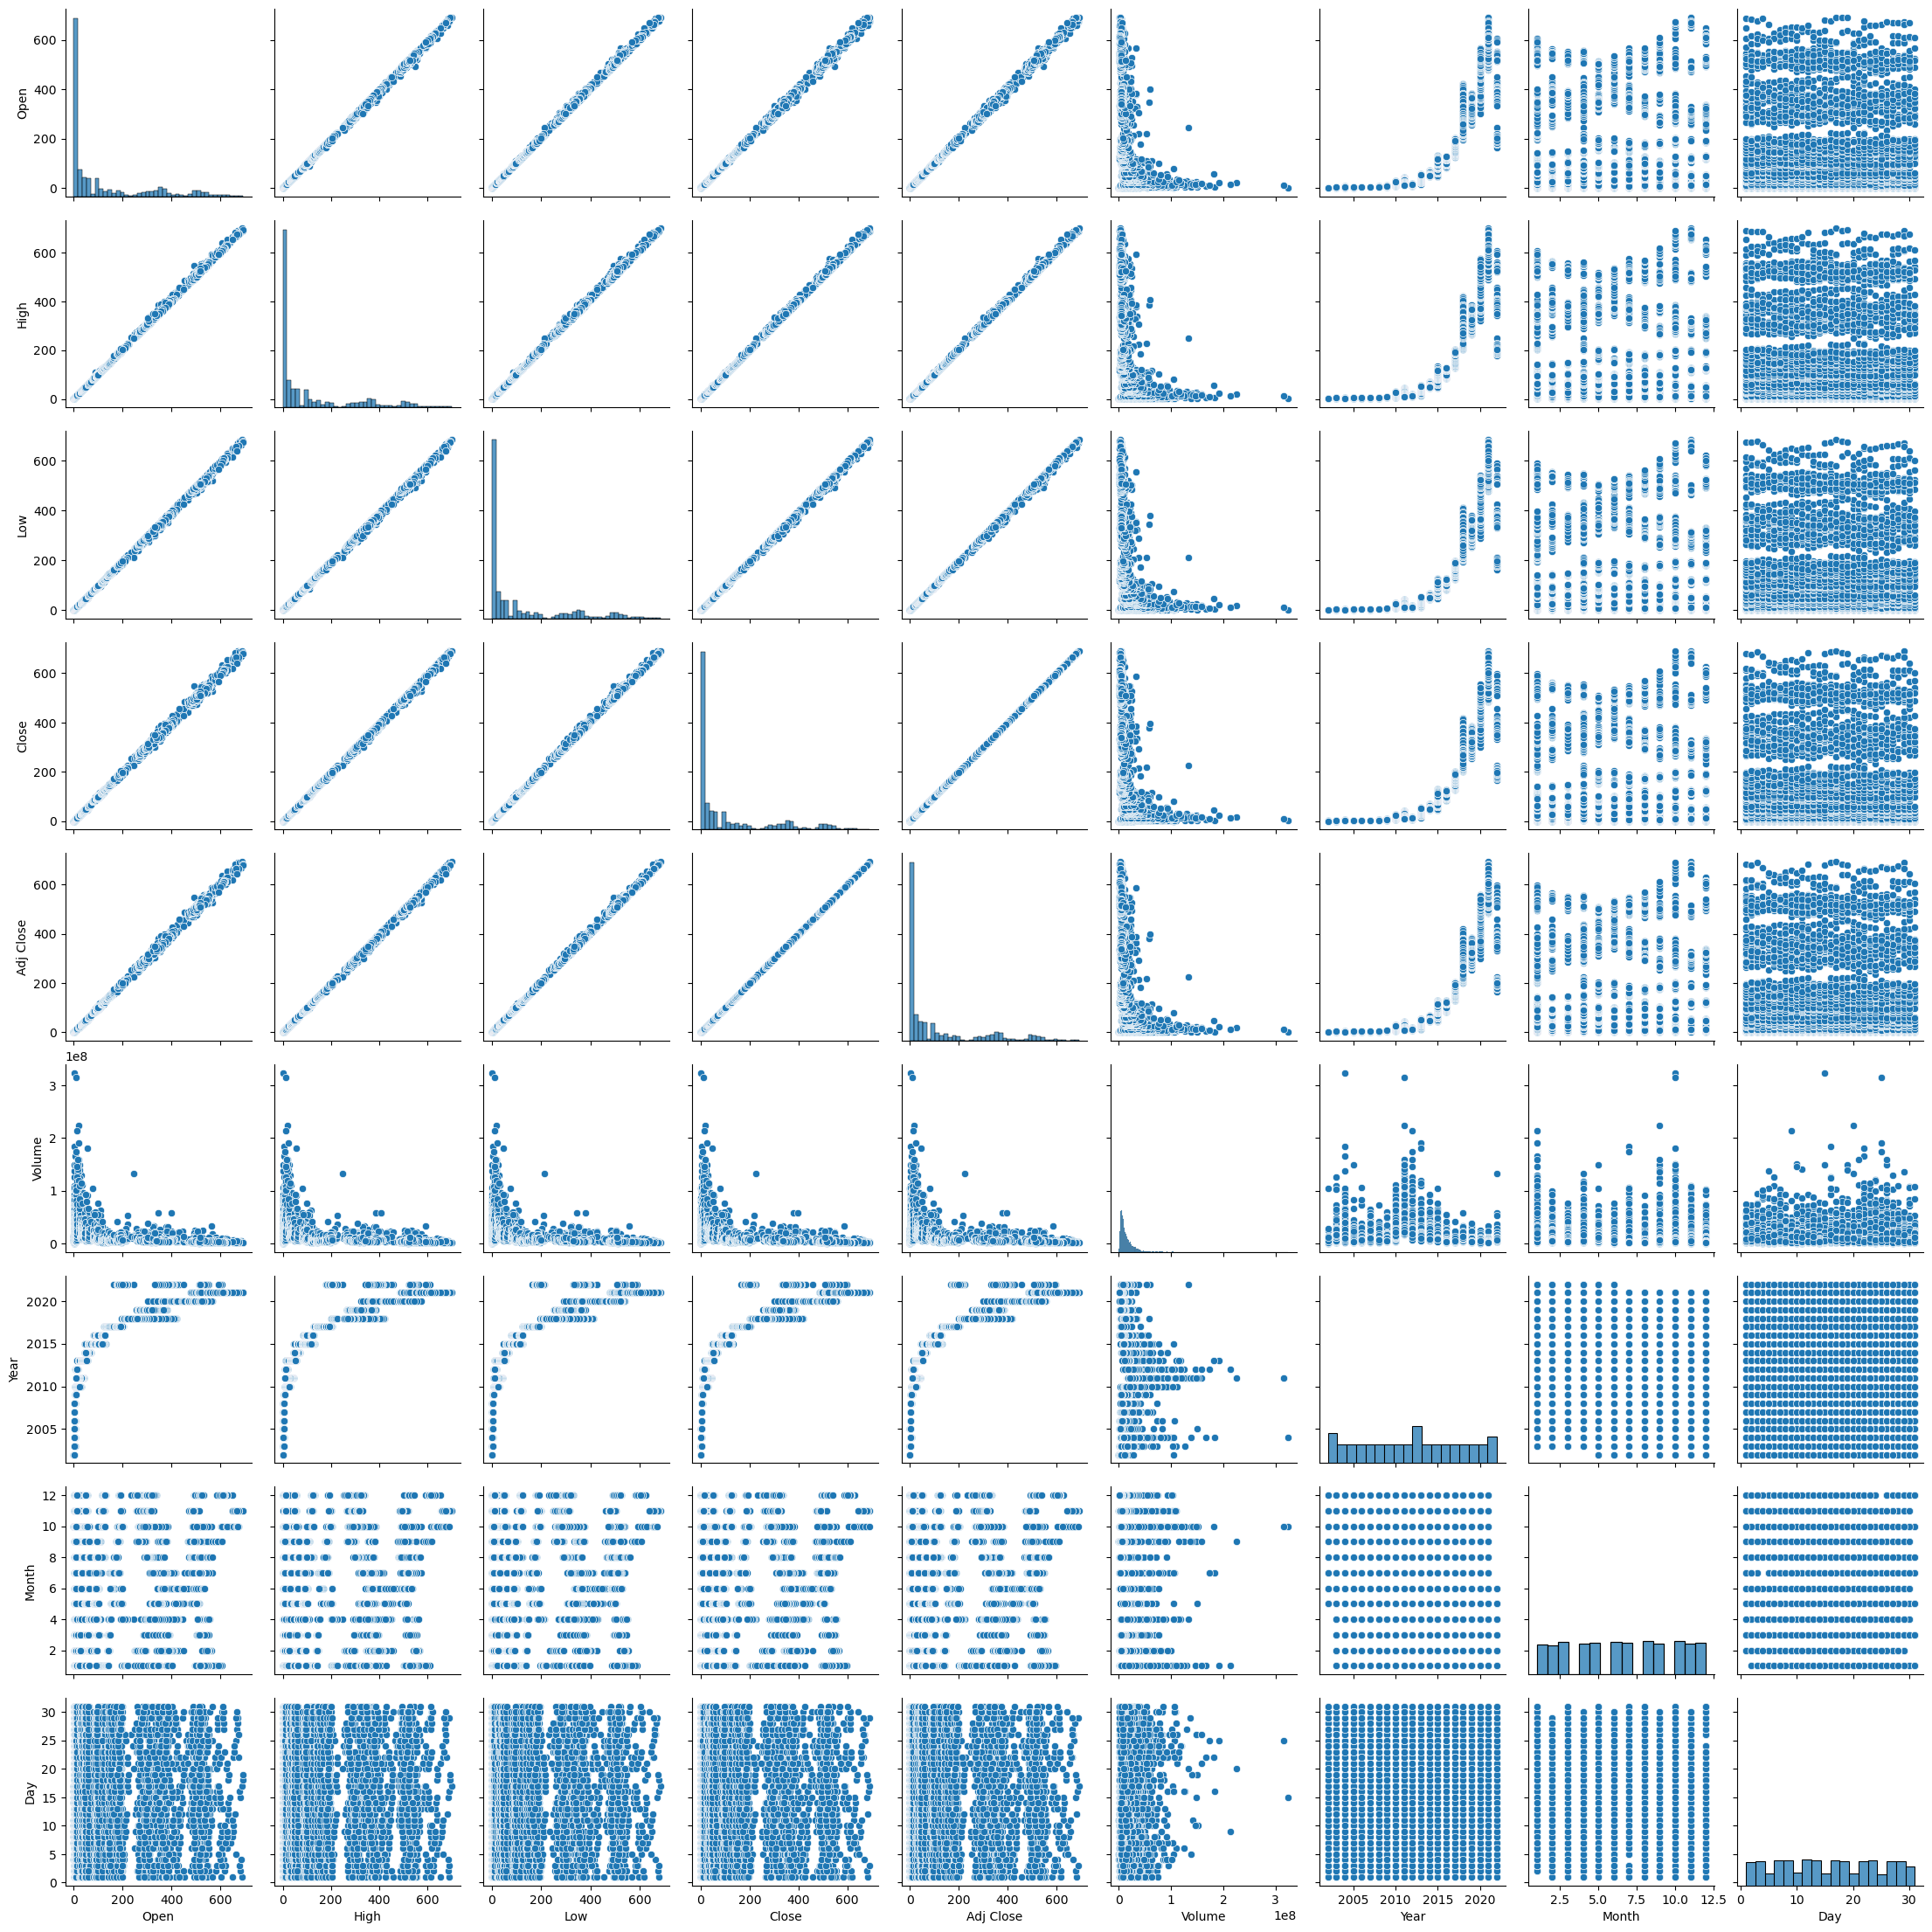

In [20]:
sns.pairplot(netflix)

# DATA DISTRIBUTION

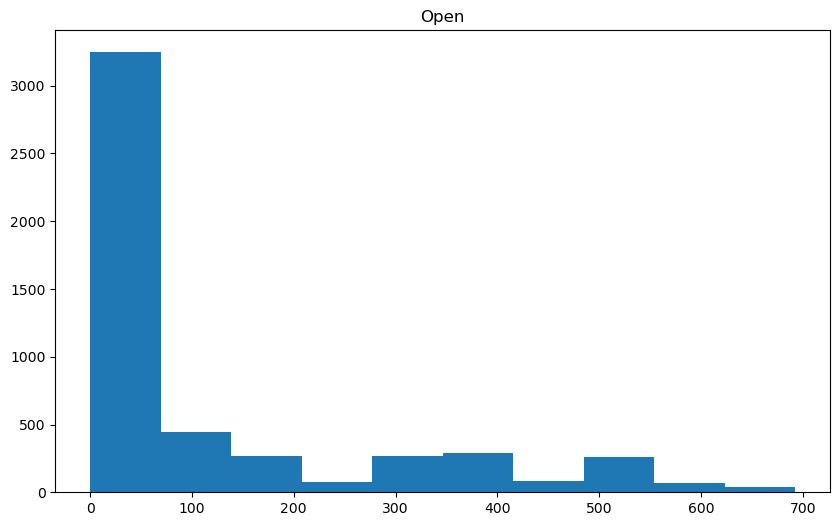

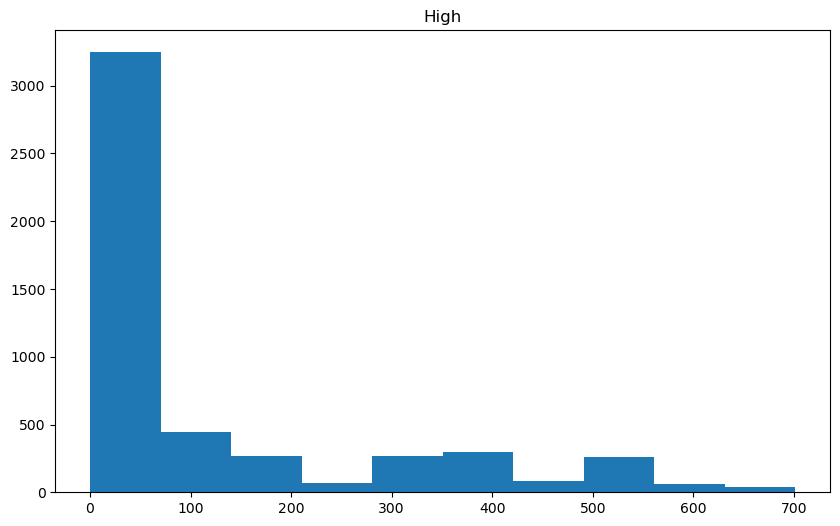

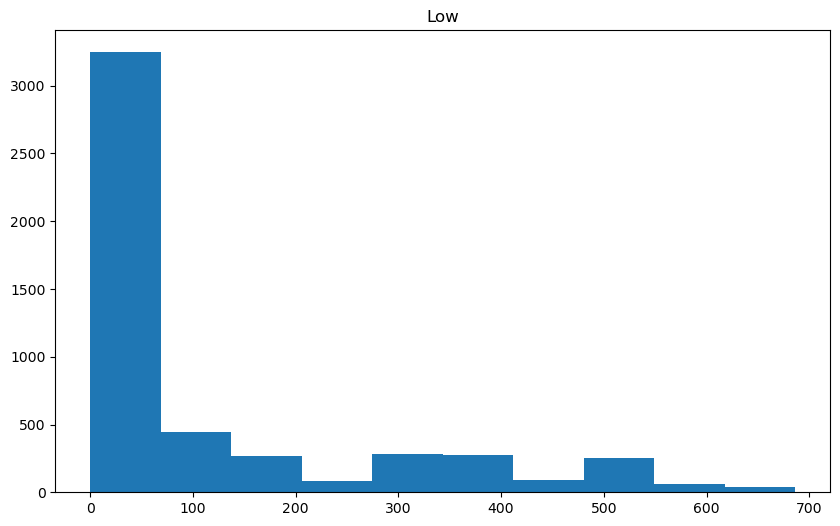

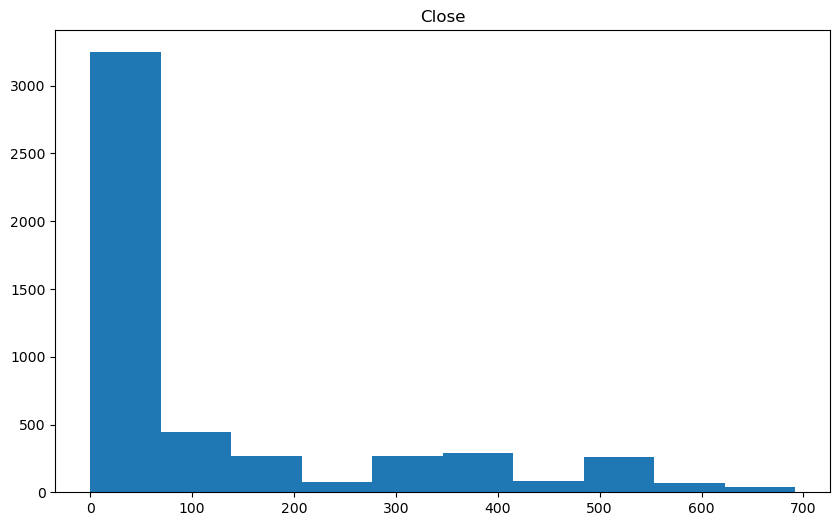

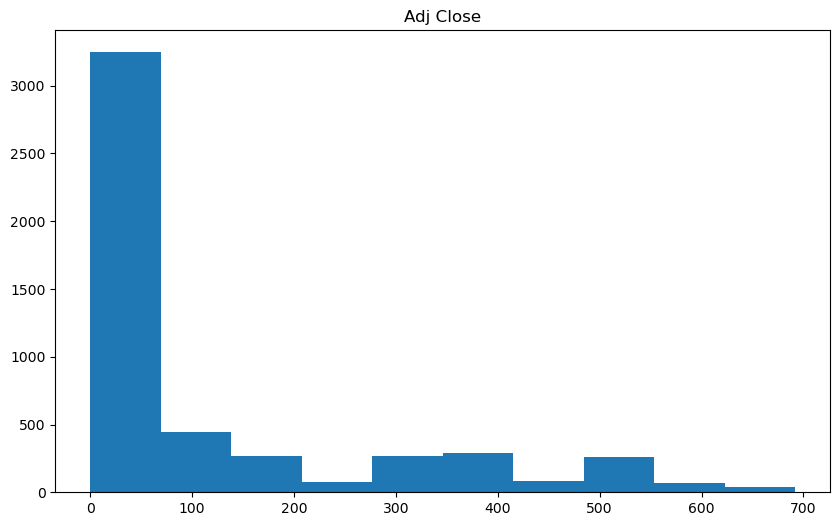

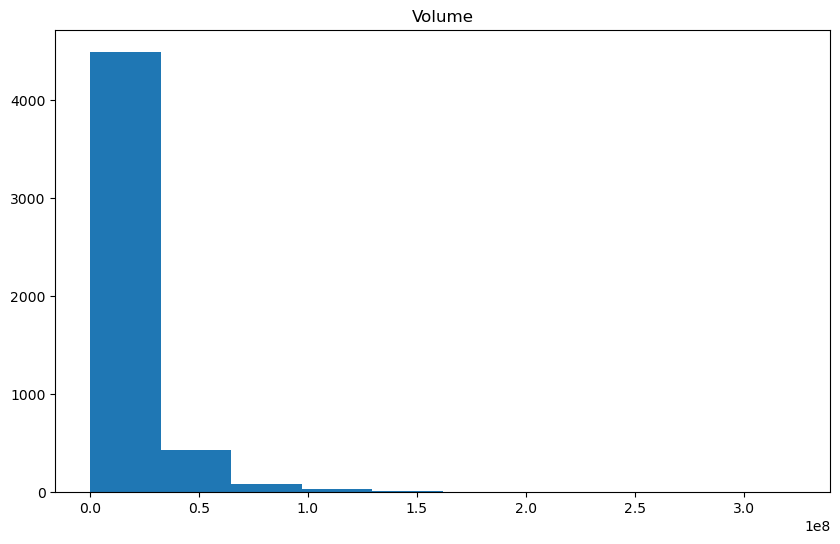

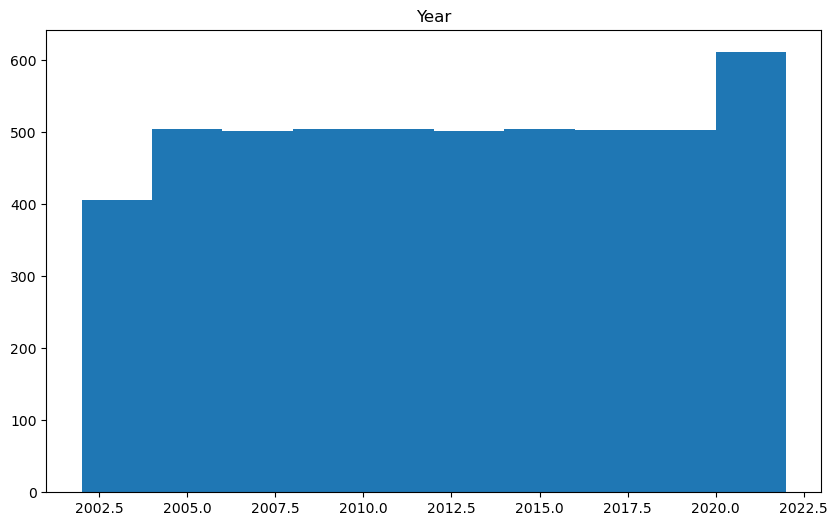

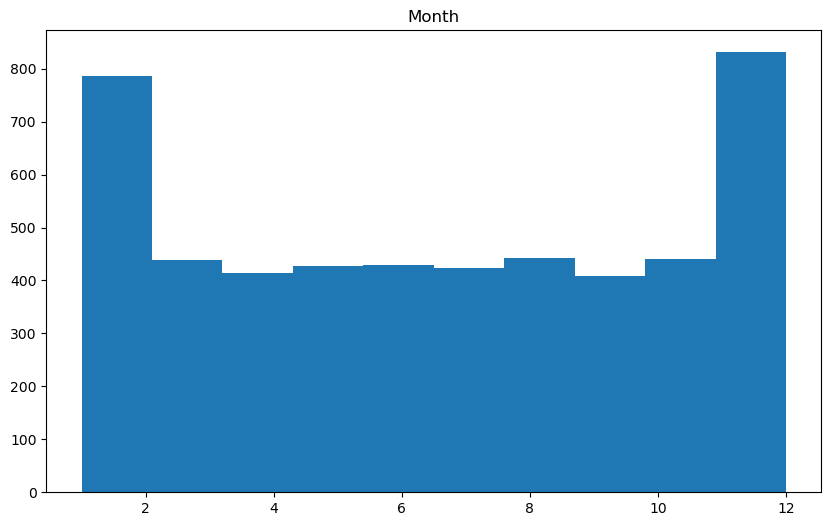

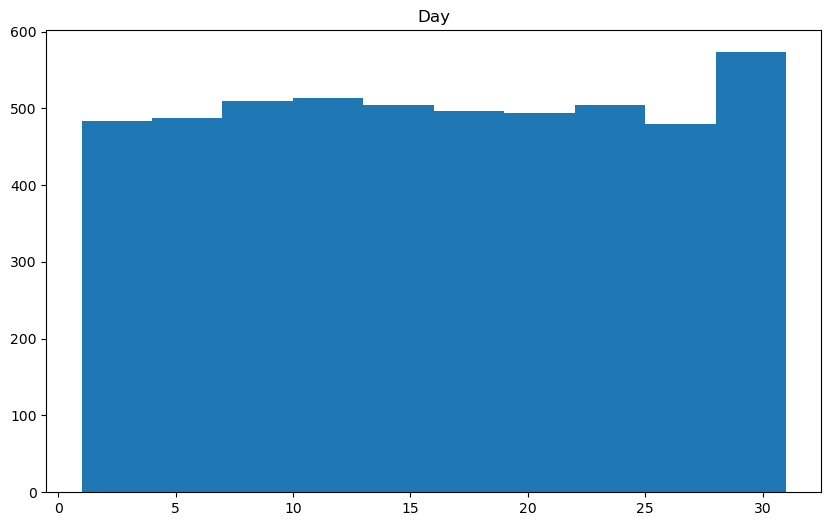

In [21]:
for i in netflix.columns:
    plt.figure(figsize = (10,6))
    plt.hist(netflix[i])
    plt.title(i)
    plt.show()

# TRAIN TEST SPLIT

In [22]:
x = netflix.drop('Close', axis = 1)
x.shape

(5044, 8)

In [23]:
y = netflix.Close

In [24]:
y.shape

(5044,)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

# NORMALIZING DATA USING STANDARD SCALAR

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale = StandardScaler()

In [29]:
x_train = scale.fit_transform(x_train)

In [30]:
x_train

array([[-0.64154707, -0.6420431 , -0.64024476, ..., -0.34869365,
        -1.03562042, -0.64560384],
       [ 1.01739918,  1.02691108,  1.02078817, ...,  1.03258125,
        -0.74469729, -1.21395676],
       [-0.69303285, -0.69385109, -0.6928678 , ..., -1.72996856,
         0.12807211, -0.87294501],
       ...,
       [-0.29930749, -0.30360988, -0.2984139 , ...,  0.3419438 ,
         0.70991837, -1.32762734],
       [ 0.22598894,  0.21605433,  0.21074454, ...,  0.85992189,
        -0.45377415,  0.15009025],
       [-0.67755908, -0.67822659, -0.67807009, ..., -1.21199047,
         1.00084151,  0.49110201]])

In [31]:
x_test = scale.fit_transform(x_test)

In [32]:
x_test

array([[ 0.05061246,  0.04495955,  0.05963726, ...,  0.75129299,
         1.32326323,  1.053486  ],
       [ 1.98158317,  1.99285223,  2.02146275, ...,  1.4405568 ,
        -0.44628236, -0.90878225],
       [-0.64700351, -0.64715213, -0.64697484, ..., -0.97186652,
         0.14356617,  0.93805846],
       ...,
       [-0.63486249, -0.63506202, -0.63464712, ..., -0.62723461,
        -1.03613089,  1.16891355],
       [-0.64845903, -0.64917288, -0.64915344, ..., -1.31649842,
         0.14356617,  0.59177583],
       [-0.64681176, -0.64725532, -0.64650546, ..., -0.97186652,
         0.14356617,  0.36092074]])

# TRAINING THE MODEL

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test)


In [37]:
y_pred

array([128.0297733 , 459.4911444 ,   9.23990684, ...,  11.33853543,
         8.6802722 ,   9.22948811])

# ACCURACY EVALUATION

In [38]:
from sklearn.metrics import r2_score , mean_squared_error

In [39]:
r2_score(y_test,y_pred)

0.9943069366178281

In [40]:
mean_squared_error(y_test,y_pred)

152.66834731182385

# PREDICTION MODEL 

In [47]:
def pred(Open,High,Low,Adj_Close,Volume,Year,Month,Day):
    features = np.array([[Open,High,Low,Adj_Close,Volume,Year,Month,Day]])
    features = scale.fit_transform(features)
    prediction = model.predict(features.reshape(1,-1))
    return prediction


In [48]:
Open = 200.45
High = 250.45
Low = 150.45
Adj_Close = 100.34
Volume = 100.45
Year = 2020
Month = 8
Day = 4
res = pred(Open,High,Low,Adj_Close,Volume,Year,Month,Day)

In [49]:
print(res)

[119.54155707]


In [50]:
import pickle

In [51]:
pickle.dump(model,open('Netflix_model.pkl','wb'))

In [52]:
model = pickle.load(open('Netflix_model.pkl','rb'))